In [1]:
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
from datetime import datetime
import os

import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import t as t_student

% matplotlib inline

In [2]:
sns.set_style('whitegrid')
sns.set_context('talk')
sns.set_palette('dark')

In [3]:
os.environ['TIINGO_API_KEY'] = 'ba62a0fba810f937382b5e772f8f152b58c4ebfc'

In [4]:
start = datetime(2005, 9, 1)
end = datetime(2019, 9, 1)
df = web.DataReader(['GOOGL'], 'tiingo', start, end)
df['logP'] = np.log(df['close'])

In [5]:
df.head()

adjClose     adjHigh      adjLow     adjOpen  adjVolume  \
symbol date                                                                    
GOOGL  2005-09-01  143.568181  144.195117  142.941246  143.397655   10923575   
       2005-09-02  144.671587  145.443972  143.663475  143.698584   13681834   
       2005-09-06  143.999513  145.143043  143.844033  144.947439   16780240   
       2005-09-07  147.891527  148.207502  143.081679  143.387624   29875491   
       2005-09-08  148.152332  150.103355  147.134189  147.871465   26345023   

                    close  divCash    high     low    open  splitFactor  \
symbol date                                                               
GOOGL  2005-09-01  286.25      0.0  287.50  285.00  285.91          1.0   
       2005-09-02  288.45      0.0  289.99  286.44  286.51          1.0   
       2005-09-06  287.11      0.0  289.39  286.80  289.00          1.0   
       2005-09-07  294.87      0.0  295.50  285.28  285.89          1.0   
       2005-09-08  295.39      0.0  299.28  293.36  294.83          1.0   

                     volume      logP  
symbol date                            
GOOGL  2005-09-01   5478700  5.656866  
       2005-09-02   6862100  5.664522  
       2005-09-06   8416100  5.659865  
       2005-09-07  14984000  5.686535  
       2005-09-08  13213300  5.688297

In [6]:
df['cum_rets'] = df['logP'].rolling(2).apply(lambda x: x[-1]-x[0], raw=True).dropna()
df = df.dropna()
df.head()

adjClose     adjHigh      adjLow     adjOpen  adjVolume  \
symbol date                                                                    
GOOGL  2005-09-02  144.671587  145.443972  143.663475  143.698584   13681834   
       2005-09-06  143.999513  145.143043  143.844033  144.947439   16780240   
       2005-09-07  147.891527  148.207502  143.081679  143.387624   29875491   
       2005-09-08  148.152332  150.103355  147.134189  147.871465   26345023   
       2005-09-09  150.008061  150.013076  148.739143  149.100258   17490242   

                    close  divCash    high     low    open  splitFactor  \
symbol date                                                               
GOOGL  2005-09-02  288.45      0.0  289.99  286.44  286.51          1.0   
       2005-09-06  287.11      0.0  289.39  286.80  289.00          1.0   
       2005-09-07  294.87      0.0  295.50  285.28  285.89          1.0   
       2005-09-08  295.39      0.0  299.28  293.36  294.83          1.0   
       2005-09-09  299.09      0.0  299.10  296.56  297.28          1.0   

                     volume      logP  cum_rets  
symbol date                                      
GOOGL  2005-09-02   6862100  5.664522  0.007656  
       2005-09-06   8416100  5.659865 -0.004656  
       2005-09-07  14984000  5.686535  0.026669  
       2005-09-08  13213300  5.688297  0.001762  
       2005-09-09   8772200  5.700745  0.012448

## Verify of the cummulative behaviour

The sum of the cum rets should always lead to the corresponding logP:

In [7]:
N = 100
assert(df.iloc[N]['logP'] == df.iloc[0]['logP'] + np.sum([df.iloc[i+1]['cum_rets'] for i in range(N)]))

# Statistical properties over time sampling

In [8]:
n_days = range(1,31)
means = []
stds = []

for n in n_days:
    real_rets = df.iloc[::n].rolling(2).apply(lambda x: x[-1]-x[0], raw=True)['logP'].dropna()
    means.append(real_rets.mean())
    stds.append(real_rets.std())

[0.0004068753672720225, 0.000814440446184111, 0.0012206261018160676, 0.0016484625673038429, 0.002041185508639507, 0.002472693850955764, 0.0028576597120953096, 0.003205517069159029, 0.0036137755529137825, 0.0039946177844630065, 0.004475629039992247, 0.004945387701911528, 0.005219898020875463, 0.005546957295191787, 0.005991926676694509, 0.006411034138318058, 0.006855467467760732, 0.007259270934449126, 0.0076590295595149755, 0.007933165663649707, 0.008325895130456631, 0.008716647178158522, 0.009118837523833453, 0.009679027912598833, 0.010039476303829445, 0.010313115362744619, 0.010842634408135801, 0.011093914590383573, 0.011644387892722189, 0.011983853353389019]


(0, 0.01)

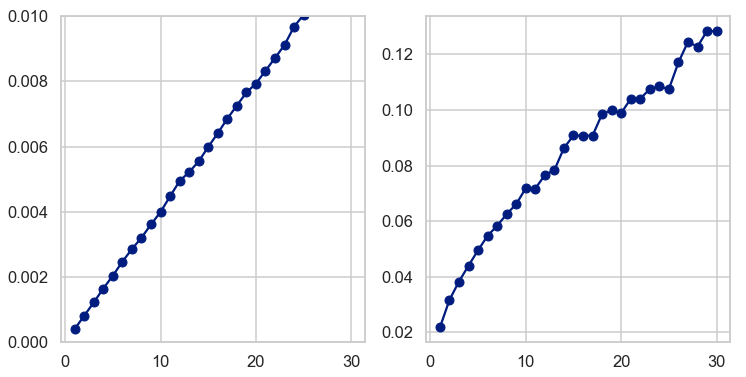

In [9]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
print(means)
    
ax[0].plot(n_days, means,'o-')
ax[1].plot(n_days, stds,'o-')
ax[0].set_ylim([0,0.01])

# Estimation

In [14]:
data = df['cum_rets']

In [15]:
distribution = stats.tukeylambda
sample_size=10000

In [16]:
invariants = invariants#[(invariants>invariants.quantile(0.005))&(invariants<invariants.quantile(0.995))]

In [17]:
dist_fit_params = distribution.fit(data, floc=data.mean())
dist_fit_params

C:\Anaconda3\envs\finance\lib\site-packages\scipy\stats\_distn_infrastructure.py:1615: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))
C:\Anaconda3\envs\finance\lib\site-packages\scipy\stats\_continuous_distns.py:5883: RuntimeWarning: divide by zero encountered in power
  Px = Fx**(lam-1.0) + (np.asarray(1-Fx))**(lam-1.0)


(-0.23957129193116092, 0.00040900752329178043, 0.006222272375756993)

In [18]:
data.mean(), data.std()

(0.00040900752329178043, 0.02178178253151971)

In [19]:
fit_sample = distribution.rvs(*dist_fit_params, size=sample_size)

In [20]:
fit_sample.mean()

0.0005658725953241875

C:\Anaconda3\envs\finance\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Anaconda3\envs\finance\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(-0.02, 0.02)

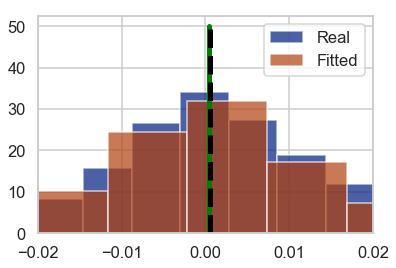

In [21]:
fig = plt.figure()
plt.hist(data, bins=150, normed=True, alpha=0.7, label='Real')
plt.hist(fit_sample[(fit_sample>min(invariants))*(fit_sample<max(invariants))], bins=50, normed=True, alpha=0.7, label='Fitted')
plt.xlim(min(invariants), max(invariants))
plt.legend()
plt.plot((invariants.mean(),invariants.mean()), (0,50), 'g', linewidth=5)
plt.plot((fit_sample.mean(),fit_sample.mean()), (0,50), 'k--', linewidth=5)
plt.xlim([-0.02, 0.02])

## Projection

In [22]:
sample_size = 100000
projections_df = pd.DataFrame()
days_list = list(range(1,31))+[40,120]
for n_days in days_list:
    projected_sample = np.zeros(sample_size)
    for k in range(n_days):
        projected_sample += distribution.rvs(*dist_fit_params, size=sample_size)
    projections_df[n_days] = projected_sample

In [23]:
means = []
stds = []

for n_days in days_list:
    real_rets = df.iloc[::n_days].rolling(2).apply(lambda x: x[-1]-x[0], raw=True)['logP'].dropna()
    means.append(real_rets.mean())
    stds.append(real_rets.std())

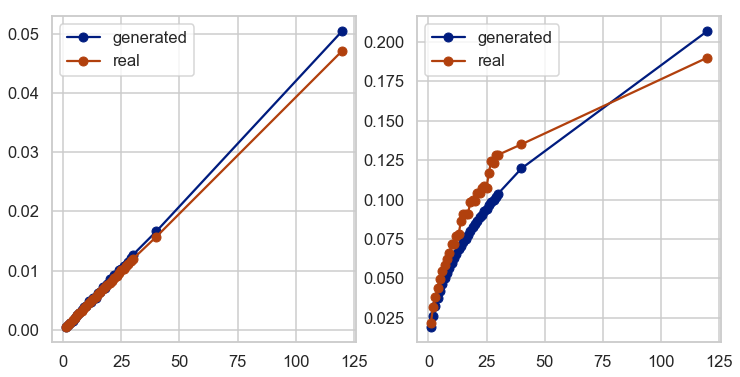

In [24]:
projections_mean = pd.DataFrame()
projections_mean['generated'] = projections_df.mean()
projections_mean['real'] = means
projections_std = pd.DataFrame()
projections_std['generated'] = projections_df.std()
projections_std['real'] = stds

fig, ax = plt.subplots(1,2,figsize=(12,6))
projections_mean.plot(style='-o', ax=ax[0])
projections_std.plot(style='-o', ax=ax[1])

In [25]:
projections_mean.head(10)

,generated,real
1,0.000507,0.000407
2,0.000787,0.000814
3,0.001223,0.001221
4,0.001492,0.001648
5,0.002022,0.002041
6,0.002519,0.002473
7,0.002781,0.002858
8,0.003433,0.003206
9,0.003834,0.003614
10,0.004028,0.003995


In [26]:
def get_slope(x):
    m,b = np.polyfit(x.index,x,1)
    return m

projections_mean.apply(get_slope)

generated    0.000420
real         0.000392
dtype: float64

### Projection over 1 month

C:\Anaconda3\envs\finance\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Anaconda3\envs\finance\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


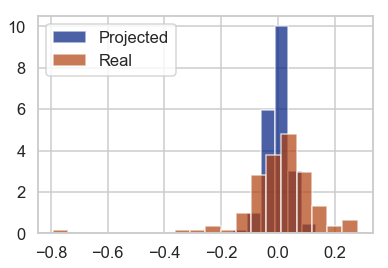

In [27]:
n_days = 5
real_rets = df.iloc[::n].rolling(2).apply(lambda x: x[-1]-x[0], raw=True)['logP'].dropna()
proj_rets = projections_df[n_days][(projections_df[n_days]<max(real_rets)) & (projections_df[n_days]>min(real_rets))]

plt.hist(proj_rets, bins=20, normed=True, alpha=0.7, label='Projected')
plt.hist(real_rets, bins=20, normed=True, alpha=0.7, label='Real')
plt.legend()

C:\Anaconda3\envs\finance\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Anaconda3\envs\finance\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Anaconda3\envs\finance\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Anaconda3\envs\finance\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.

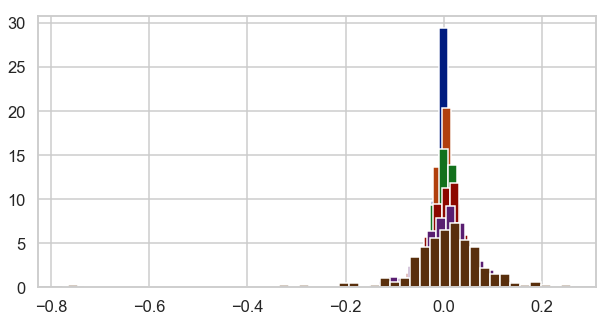

In [28]:
fig = plt.figure(figsize=(10,5))

for n_days in [1,2,3,5,10,15]:
    real_rets = df.iloc[::n_days].rolling(2).apply(lambda x: x[-1]-x[0], raw=True)['logP'].dropna()
    real_rets.hist(normed=True, bins=50)

# Projection of all

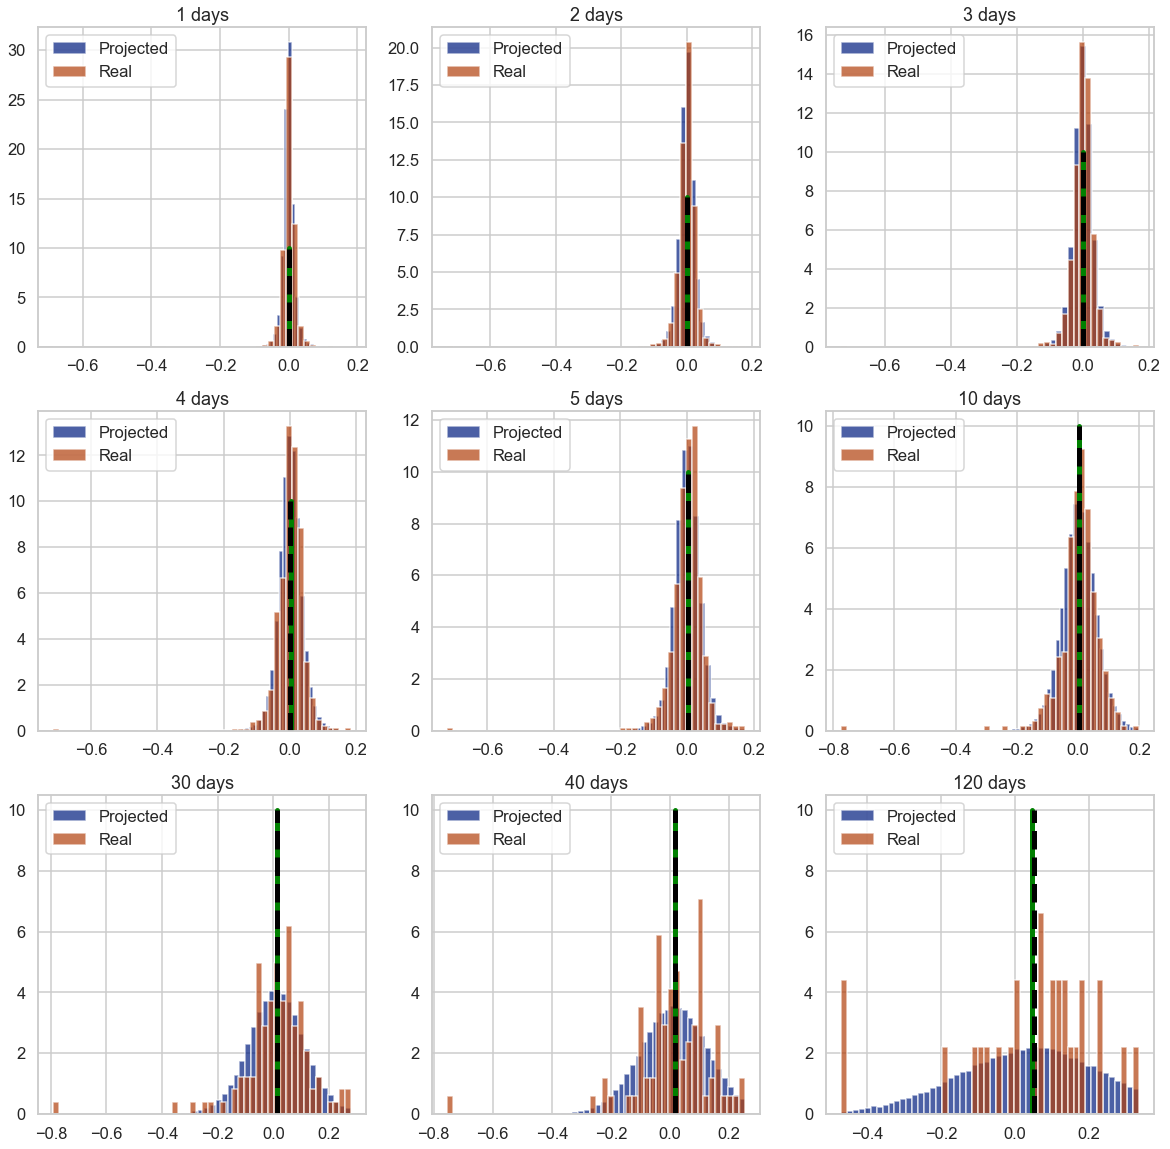

In [29]:
plotdays=[1,2,3,4,5,10,30,40,120]
fig, ax = plt.subplots(3,3, figsize=(20,20))
for n, n_days in enumerate(plotdays):
    real_rets = df.iloc[::n_days].rolling(2).apply(lambda x: x[-1]-x[0], raw=True)['logP'].dropna()
    proj_rets = projections_df[n_days]

    ax.ravel()[n].hist(proj_rets[(proj_rets<max(real_rets)) & (proj_rets>min(real_rets))], bins=50, density=True, alpha=0.7, label='Projected')
    ax.ravel()[n].hist(real_rets, bins=50, density=True, alpha=0.7, label='Real')
    ax.ravel()[n].plot((real_rets.mean(),real_rets.mean()), (0,10), 'g', linewidth=5)
    ax.ravel()[n].plot((proj_rets.mean(),proj_rets.mean()), (0,10), 'k--', linewidth=5)
    ax.ravel()[n].legend()
    ax.ravel()[n].set_title('%i days' % n_days)